# 1 ) INSTALL AND IMPORT LIBRARIES

In [1]:

!pip install yfinance as yfinance
!pip install mplfinance
     

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [2]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline


# 2) DATA COLLECTION

In [3]:
aqr_stocks = yf.download(" ADANIPORTS.NS JIOFIN.NS AXS   PANW SBIN.NS", start=datetime.datetime(2019, 1, 1), 
                             end=datetime.datetime(2024,2,20), group_by='tickers')
aqr_stocks.head(10)

[*********************100%%**********************]  5 of 5 completed


Ticker     JIOFIN.NS                                       PANW             \
Price           Open High Low Close Adj Close Volume       Open       High   
Date                                                                         
2019-01-01       NaN  NaN NaN   NaN       NaN    NaN        NaN        NaN   
2019-01-02       NaN  NaN NaN   NaN       NaN    NaN  61.680000  62.389999   
2019-01-03       NaN  NaN NaN   NaN       NaN    NaN  60.456669  60.959999   
2019-01-04       NaN  NaN NaN   NaN       NaN    NaN  60.686668  62.043331   
2019-01-07       NaN  NaN NaN   NaN       NaN    NaN  61.759998  62.666668   
2019-01-08       NaN  NaN NaN   NaN       NaN    NaN  63.033333  63.799999   
2019-01-09       NaN  NaN NaN   NaN       NaN    NaN  63.406666  65.003334   
2019-01-10       NaN  NaN NaN   NaN       NaN    NaN  63.986668  65.533333   
2019-01-11       NaN  NaN NaN   NaN       NaN    NaN  65.403336  66.000000   
2019-01-14       NaN  NaN NaN   NaN       NaN    NaN  64.673332  65.423332   

Ticker                            ...        AXS                        \
Price             Low      Close  ...        Low      Close  Adj Close   
Date                              ...                                    
2019-01-01        NaN        NaN  ...        NaN        NaN        NaN   
2019-01-02  60.639999  61.070000  ...  50.650002  51.070000  43.700138   
2019-01-03  59.599998  59.900002  ...  50.759998  50.950001  43.597450   
2019-01-04  60.540001  61.463333  ...  51.410000  53.320000  45.625431   
2019-01-07  61.573334  62.450001  ...  52.709999  52.779999  45.163364   
2019-01-08  62.369999  63.476665  ...  52.310001  53.029999  45.377289   
2019-01-09  63.389999  64.370003  ...  53.070000  53.720001  45.967716   
2019-01-10  63.403332  65.333336  ...  53.090000  53.810001  46.044727   
2019-01-11  65.043335  65.323334  ...  53.410000  53.889999  46.113182   
2019-01-14  64.333336  64.976669  ...  53.549999  53.990002  46.198753   

Ticker                    SBIN.NS                                      \
Price          Volume        Open        High         Low       Close   
Date                                                                    
2019-01-01        NaN  297.500000  300.700012  293.850006  299.600006   
2019-01-02   968700.0  299.100006  302.500000  293.100006  293.899994   
2019-01-03   844500.0  295.000000  295.549988  290.100006  291.100006   
2019-01-04  1003200.0  292.100006  299.000000  291.500000  297.649994   
2019-01-07   635500.0  301.049988  301.500000  295.200012  296.299988   
2019-01-08   504300.0  295.799988  306.000000  294.750000  305.299988   
2019-01-09   510300.0  306.000000  307.100006  300.750000  305.299988   
2019-01-10   426500.0  305.100006  307.500000  303.500000  305.549988   
2019-01-11   338900.0  305.399994  306.200012  300.950012  302.750000   
2019-01-14   317400.0  301.000000  303.600006  299.549988  300.399994   

Ticker                              
Price        Adj Close      Volume  
Date                                
2019-01-01  286.725769  11837127.0  
2019-01-02  281.270721  25559853.0  
2019-01-03  278.591064  17548347.0  
2019-01-04  284.859589  19514041.0  
2019-01-07  283.567596  14579399.0  
2019-01-08  292.180847  22949961.0  
2019-01-09  292.180847  21109911.0  
2019-01-10  292.420105  16295468.0  
2019-01-11  289.740417  12702551.0  
2019-01-14  287.491425  10372933.0  

[10 rows x 30 columns]

# 3) DATA ANALYSIS

In [4]:
aqr_stocks.describe()

Ticker   JIOFIN.NS                                                  \
Price         Open        High         Low       Close   Adj Close   
count   122.000000  122.000000  122.000000  122.000000  122.000000   
mean    236.705738  240.256557  233.034426  236.180737  236.180737   
std      16.860367   17.708120   15.924556   16.833842   16.833842   
min     202.800003  211.800003  202.800003  206.600006  206.600006   
25%     224.537498  226.049999  220.950005  224.575001  224.575001   
50%     235.000000  236.424995  232.050003  233.750000  233.750000   
75%     246.650005  250.162498  241.500000  245.487503  245.487503   
max     285.700012  295.700012  273.000000  289.100006  289.100006   

Ticker                       PANW                                         ...  \
Price         Volume         Open         High          Low        Close  ...   
count   1.220000e+02  1291.000000  1291.000000  1291.000000  1291.000000  ...   
mean    3.089560e+07   141.675373   143.758629   139.632014   141.766754  ...   
std     3.936135e+07    67.534190    68.594949    66.606532    67.720991  ...   
min     4.289046e+06    43.876667    46.983334    41.823334    44.193333  ...   
25%     1.251024e+07    79.603333    80.566666    78.594997    79.708332  ...   
50%     1.842874e+07   130.633331   131.556671   128.976669   130.323334  ...   
75%     3.137048e+07   178.848335   182.153336   175.341667   178.721664  ...   
max     2.810401e+08   375.450012   380.839996   369.000000   376.899994  ...   

Ticker          AXS                                              SBIN.NS  \
Price           Low        Close    Adj Close        Volume         Open   
count   1291.000000  1291.000000  1291.000000  1.291000e+03  1269.000000   
mean      53.060085    53.666135    49.130414  5.515239e+05   415.387826   
std        6.338267     6.272691     6.210627  3.128039e+05   142.189416   
min       31.820000    33.290001    29.169844  1.031000e+05   151.949997   
25%       50.299999    50.950001    46.319092  3.511500e+05   297.000000   
50%       54.090000    54.669998    50.668133  4.684000e+05   429.350006   
75%       56.695000    57.240002    53.482164  6.432000e+05   537.099976   
max       66.779999    67.250000    61.633518  2.664200e+06   763.450012   

Ticker                                                                    
Price          High          Low        Close    Adj Close        Volume  
count   1269.000000  1269.000000  1269.000000  1269.000000  1.269000e+03  
mean     420.257211   409.924271   415.030378   404.218361  3.104457e+07  
std      142.924140   141.518422   142.285728   143.843698  2.542859e+07  
min      153.199997   149.449997   150.850006   144.367783  3.692065e+06  
25%      302.500000   292.200012   297.399994   284.620300  1.413038e+07  
50%      432.899994   425.000000   429.500000   414.452454  2.179229e+07  
75%      544.700012   531.250000   538.200012   526.469360  4.071885e+07  
max      774.599976   753.349976   761.700012   761.700012  2.149557e+08  

[8 rows x 30 columns]

In [5]:
aqr_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1332 entries, 2019-01-01 to 2024-02-19
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (JIOFIN.NS, Open)           122 non-null    float64
 1   (JIOFIN.NS, High)           122 non-null    float64
 2   (JIOFIN.NS, Low)            122 non-null    float64
 3   (JIOFIN.NS, Close)          122 non-null    float64
 4   (JIOFIN.NS, Adj Close)      122 non-null    float64
 5   (JIOFIN.NS, Volume)         122 non-null    float64
 6   (PANW, Open)                1291 non-null   float64
 7   (PANW, High)                1291 non-null   float64
 8   (PANW, Low)                 1291 non-null   float64
 9   (PANW, Close)               1291 non-null   float64
 10  (PANW, Adj Close)           1291 non-null   float64
 11  (PANW, Volume)              1291 non-null   float64
 12  (ADANIPORTS.NS, Open)       1269 non-null   float64
 13  (ADANIPORTS.NS,

In [6]:
aqr_stocks.shape

(1332, 30)

In [7]:
adj_close = pd.DataFrame()

In [8]:
tickers = ['ADANIPORTS.NS','JIOFIN.NS', 'AXS',  'PANW','SBIN.NS']
for ticker in tickers:
    adj_close[ticker] = aqr_stocks[ticker]['Adj Close']

adj_close

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2019-01-01,376.710571,NaN,NaN,NaN,286.725769
2019-01-02,369.253784,NaN,43.700138,61.070000,281.270721
2019-01-03,366.154907,NaN,43.597450,59.900002,278.591064
2019-01-04,370.076935,NaN,45.625431,61.463333,284.859589
2019-01-07,369.592773,NaN,45.163364,62.450001,283.567596
...,...,...,...,...,...
2024-02-13,1264.800049,272.750000,59.498634,368.260010,713.450012
2024-02-14,1267.849976,273.000000,60.432026,368.329987,743.400024
2024-02-15,1267.050049,274.049988,61.633518,366.880005,761.700012


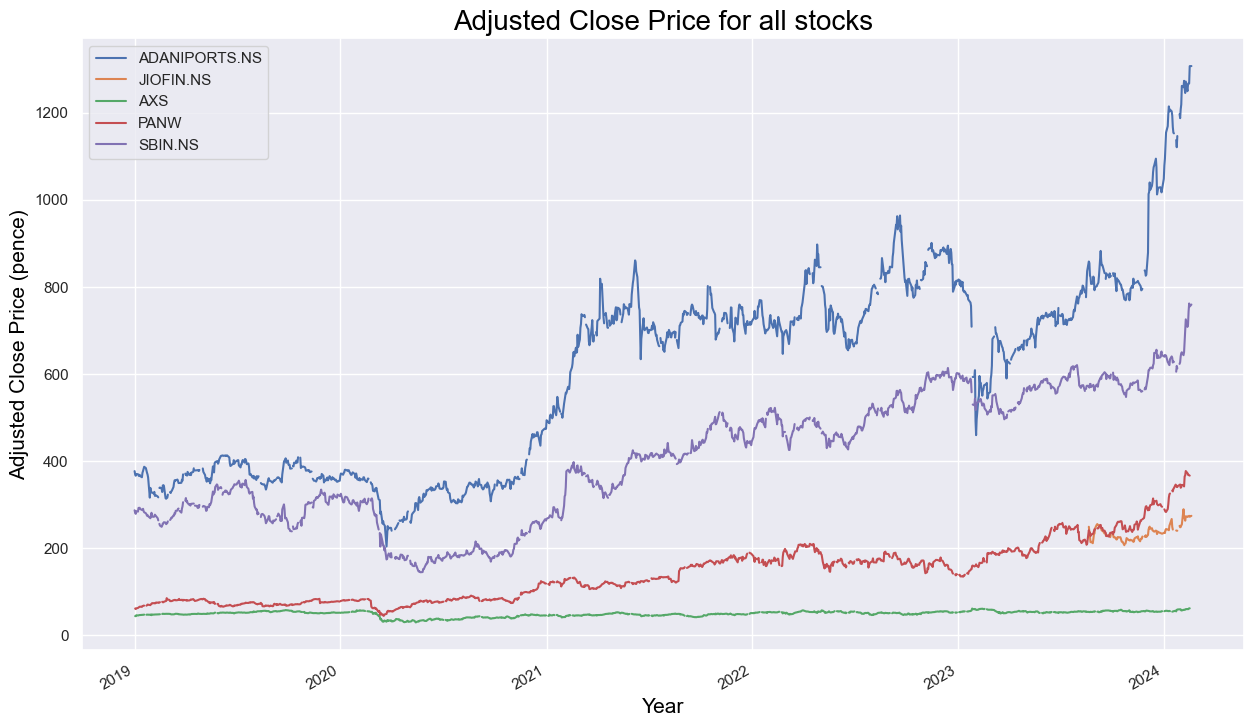

In [14]:
adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

In [15]:
adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
min,203.566116,206.600006,29.169844,44.193333,144.367783
max,1307.000000,289.100006,61.633518,376.899994,761.700012


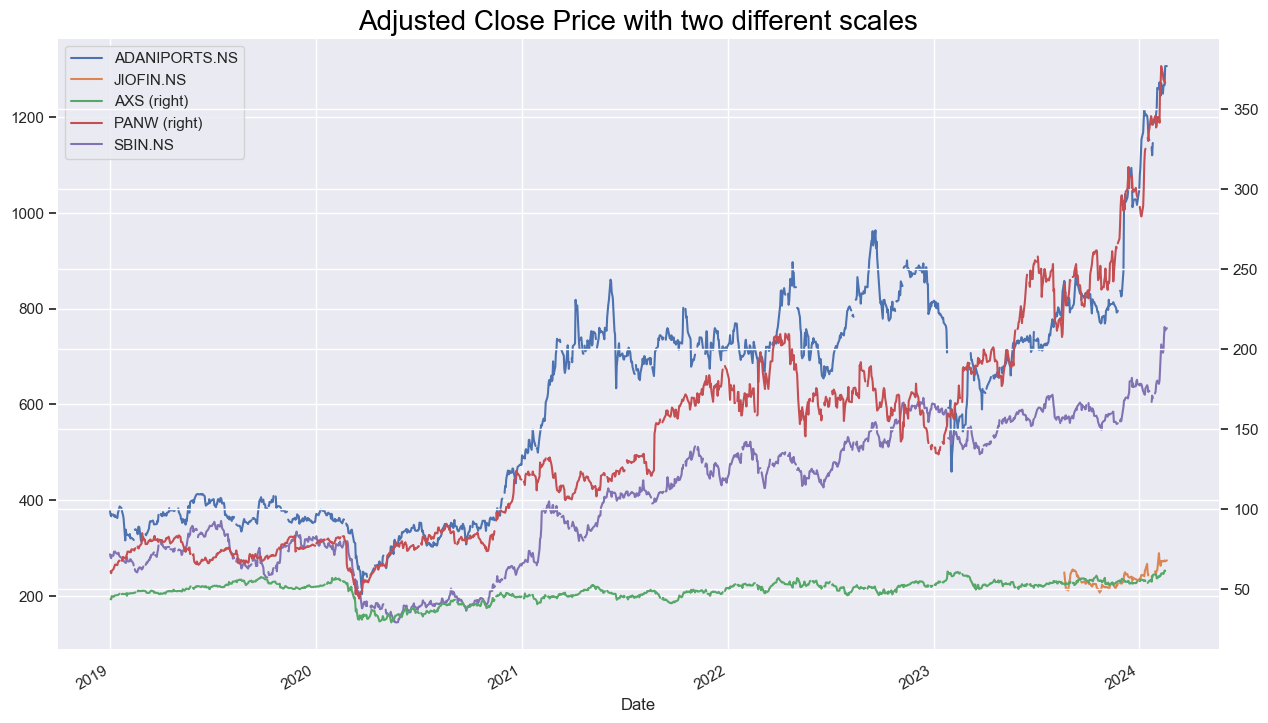

In [17]:
adj_close.plot(secondary_y = ["AXS", "PANW"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

# DATA TRANSFORMATION

In [87]:
returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()
     

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2019-01-01,1.000000,NaN,NaN,NaN,1.000000
2019-01-02,0.980205,NaN,NaN,NaN,0.980975
2019-01-03,0.971979,NaN,NaN,NaN,0.971629
2019-01-04,0.982391,NaN,NaN,NaN,0.993491
2019-01-07,0.981105,NaN,NaN,NaN,0.988985


# 5.1) STOCK RETURN/ STOCK PROFIT THROUGHOUT THE  TIME PERIOD

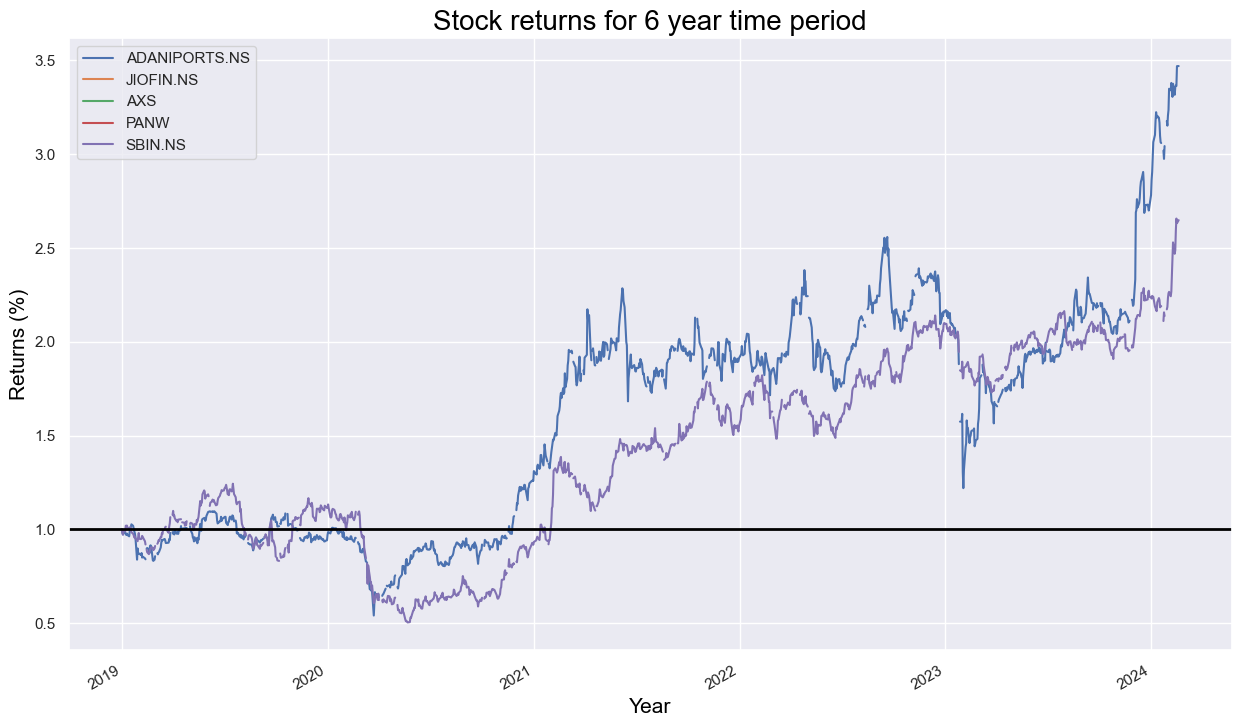

In [88]:
returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 6 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

In [89]:
returns = pd.DataFrame()
     

# 5.2) PRECENTAGE CHANGE

In [90]:
tickers = ['ADANIPORTS.NS','JIOFIN.NS', 'AXS','PANW' ,'SBIN.NS']
for ticker in tickers:
    returns[ticker] = aqr_stocks[ticker]['Adj Close'].pct_change() * 100

returns

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,-1.979455,NaN,NaN,NaN,-1.902542
2019-01-03,-0.839219,NaN,-0.234977,-1.915831,-0.952697
2019-01-04,1.071130,NaN,4.651623,2.609902,2.250081
2019-01-07,-0.130835,NaN,-1.012732,1.605295,-0.453554
...,...,...,...,...,...
2024-02-13,1.236649,0.478905,-0.728964,-0.997390,0.784007
2024-02-14,0.241139,0.091659,1.568762,0.019002,4.197913
2024-02-15,-0.063093,0.384611,1.988168,-0.393664,2.461661


# CLEANING THE (NAN) VALUES FROM THE DATA AS THEIR IS NO PRICE CHANGE FROM THAT DAY BEFORE

In [93]:
returns.dropna(inplace=True)
returns.head()

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2023-08-22,-0.425336,-5.002008,-1.042811,-2.595407,-0.559736
2023-08-23,-3.370391,-4.990486,0.406731,0.468966,1.477577
2023-08-24,-0.405721,-4.985532,1.325721,-3.483835,0.008665
2023-08-25,-1.915243,0.491920,-1.108487,1.455264,-1.213277
2023-08-28,0.105385,-1.561774,0.257259,0.719364,0.508810


# Plot returns for 2023

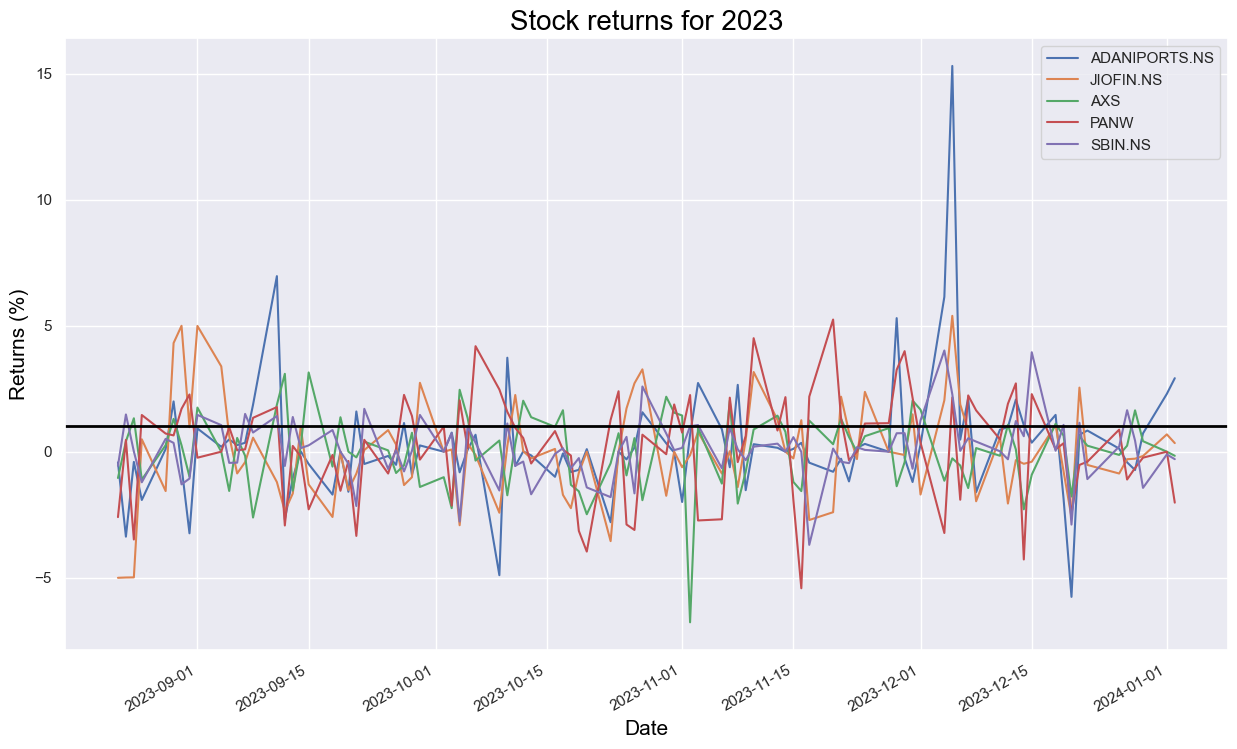

In [96]:

returns.loc['2019-01-01':'2024-1-2'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2023', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

In [97]:
stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1)))

stock_change.head()

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.019993,NaN,NaN,NaN,-0.019209
2019-01-03,-0.008428,NaN,-0.002353,-0.019344,-0.009573
2019-01-04,0.010654,NaN,0.045467,0.025764,0.022251
2019-01-07,-0.001309,NaN,-0.010179,0.015925,-0.004546


In [98]:
stock_change.dropna(inplace=True)
stock_change.head()

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2023-08-22,-0.004262,-0.051314,-0.010483,-0.026297,-0.005613
2023-08-23,-0.034285,-0.051193,0.004059,0.004679,0.014668
2023-08-24,-0.004065,-0.051141,0.013170,-0.035460,0.000087
2023-08-25,-0.019338,0.004907,-0.011147,0.014448,-0.012207
2023-08-28,0.001053,-0.015741,0.002569,0.007168,0.005075


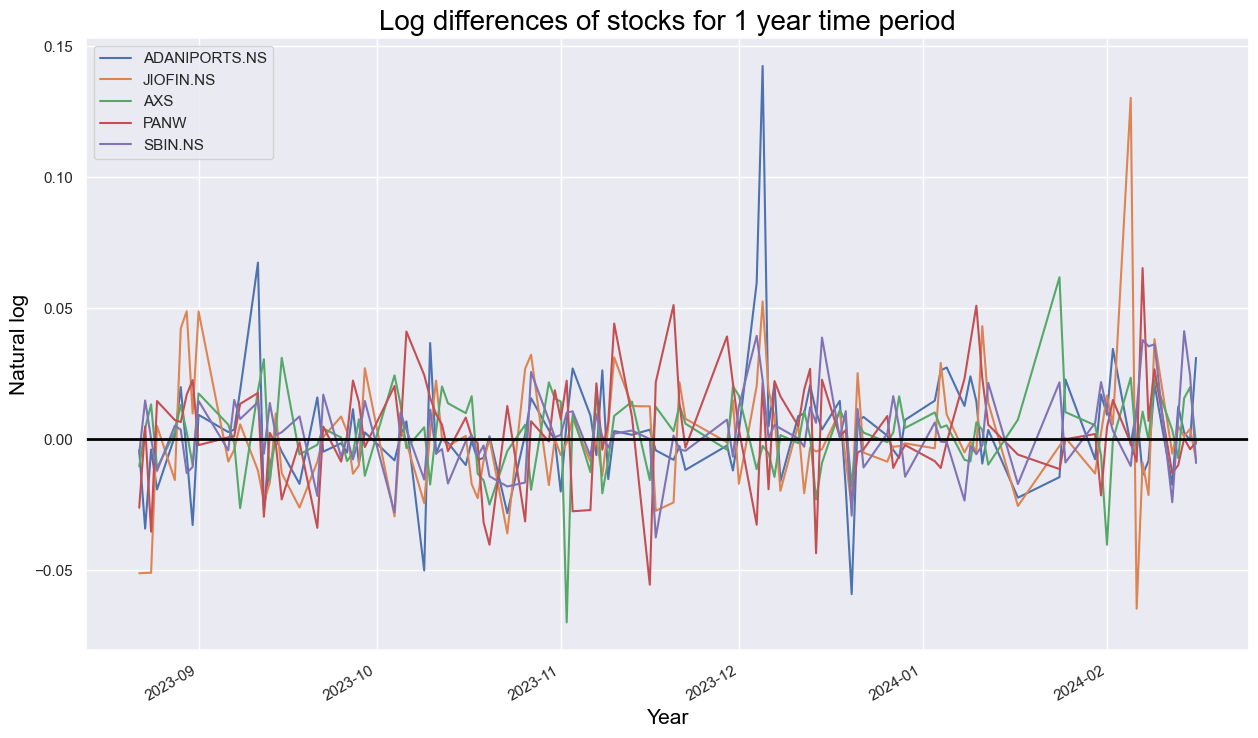

In [100]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 1 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

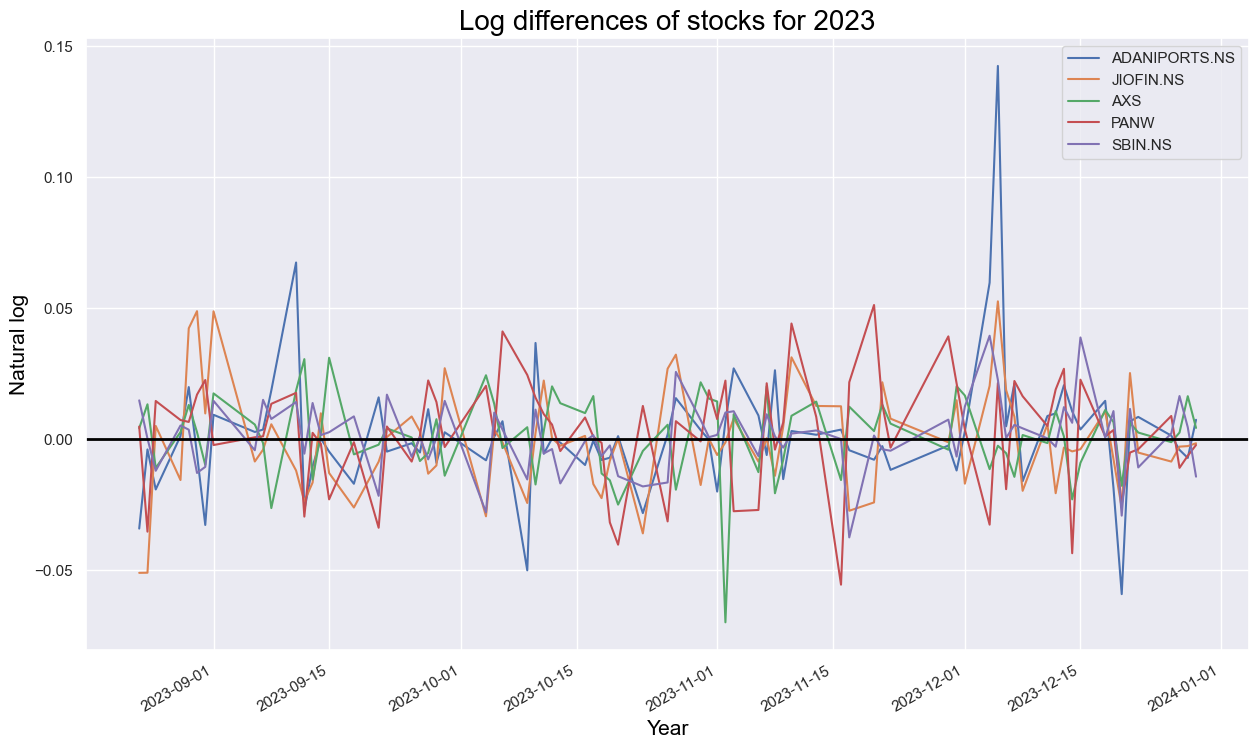

In [101]:
stock_change.loc['2019-01-01':'2024-1-1'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2023', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

# 5.3) ANNUAL RETUNRS

In [103]:
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

,ADANIPORTS.NS,JIOFIN.NS,AXS,PANW,SBIN.NS
Date,,,,,
2023-08-22,-107.413369,-1293.123602,-264.168144,-662.679924,-141.449778
2023-08-23,-863.981404,-1290.067325,102.288391,117.903127,369.625294
2023-08-24,-102.449610,-1288.753438,331.886601,-893.584017,2.183459
2023-08-25,-487.322976,123.659914,-280.898581,364.083678,-307.615636
2023-08-28,26.543075,-396.672845,64.746132,180.630736,127.895056
...,...,...,...,...,...
2024-02-12,-442.862516,-143.483505,83.637966,-331.800208,-610.181403
2024-02-13,309.724355,120.396009,-184.371651,-252.604099,196.799380
2024-02-14,60.693890,23.087496,392.259315,4.788052,1036.272289


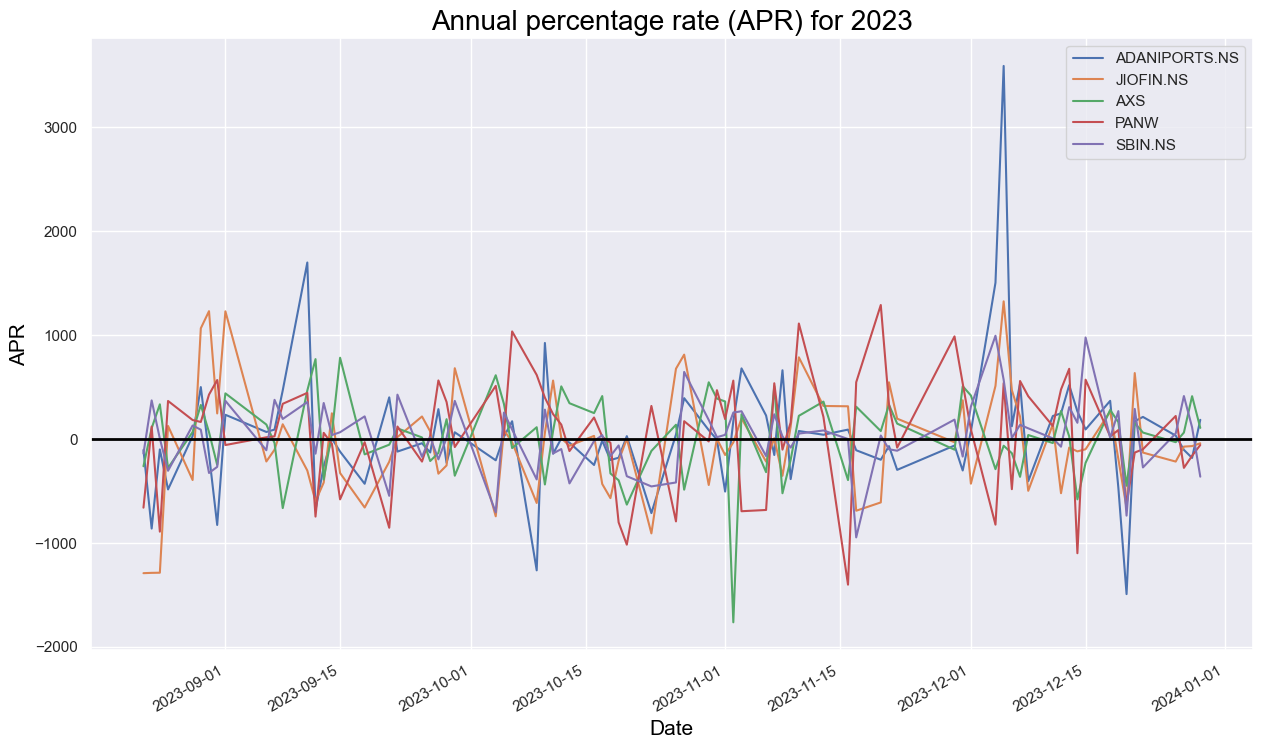

In [111]:
stock_change_apr['2023-01-01':'2023-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2023', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);
    

In [109]:
#Calculating statistical data for returns

# Date of worst single day returns

returns.idxmin()
     

ADANIPORTS.NS   2023-12-20
JIOFIN.NS       2024-01-16
AXS             2023-11-02
PANW            2023-11-16
SBIN.NS         2023-11-17
dtype: datetime64[ns]

In [112]:
# Date of best single day returns

returns.idxmax()

ADANIPORTS.NS   2023-12-05
JIOFIN.NS       2024-02-05
AXS             2024-01-24
PANW            2024-02-07
SBIN.NS         2024-02-14
dtype: datetime64[ns]

In [113]:
# Compute mean to give a representation of the average expected returns 

returns.mean()

ADANIPORTS.NS    0.350483
JIOFIN.NS        0.103405
AXS              0.120807
PANW             0.345622
SBIN.NS          0.229857
dtype: float64

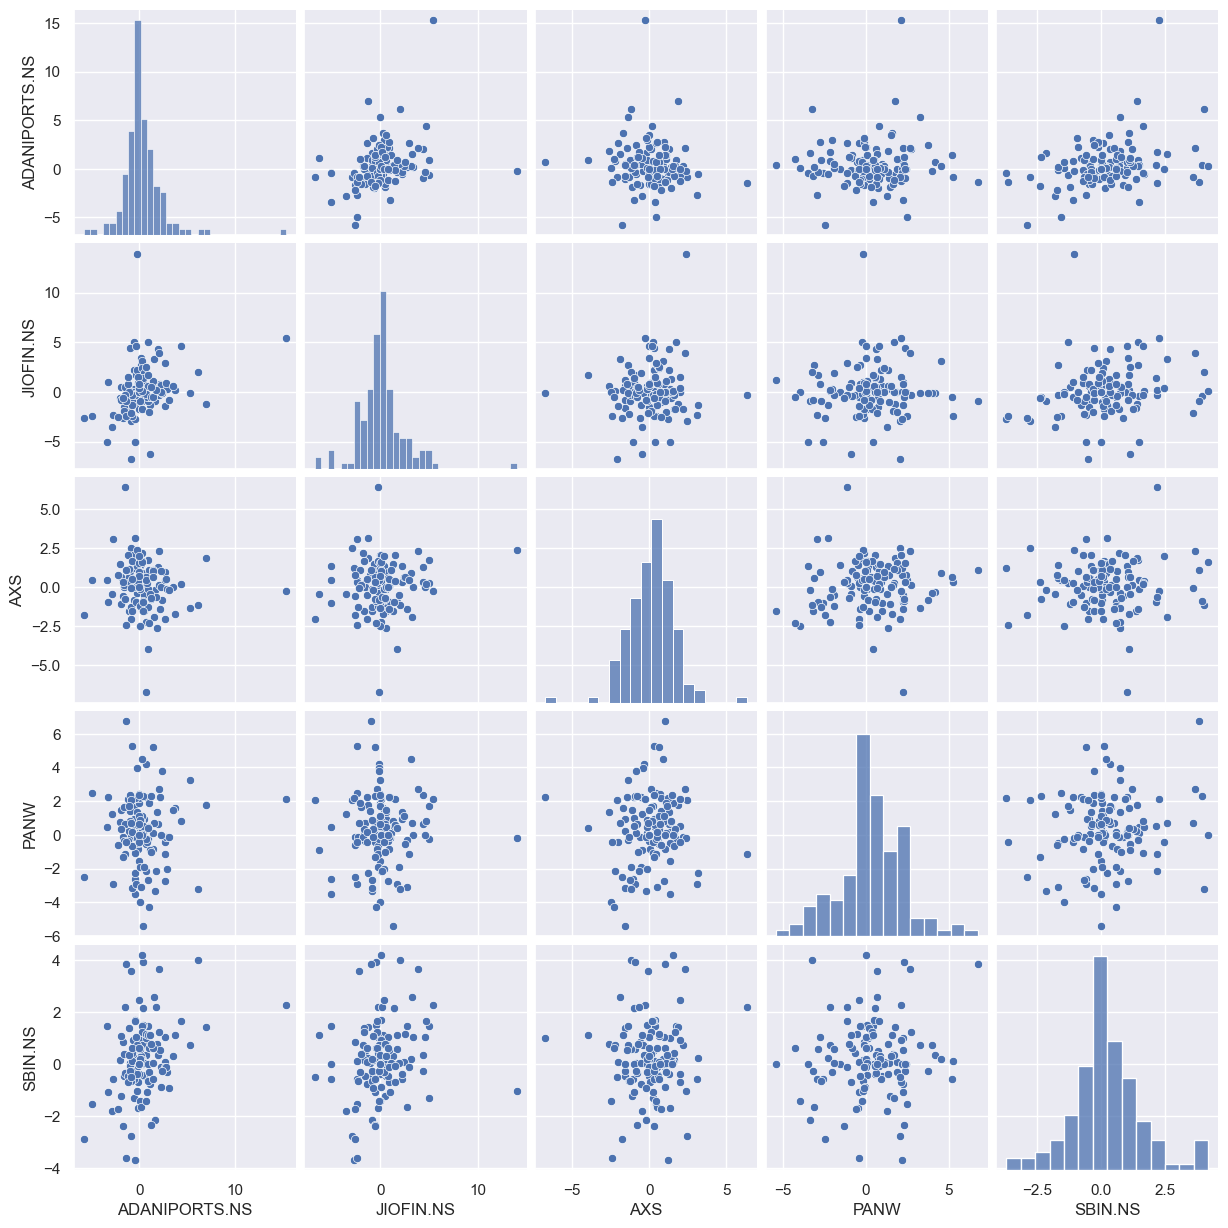

In [114]:
sns.pairplot(returns);

C:\Users\sachi\AppData\Local\Temp\ipykernel_13316\801949836.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2023-01-01':'2023-12-31'][ticker], color='green', bins=100, ax=axs[index])
C:\Users\sachi\AppData\Local\Temp\ipykernel_13316\801949836.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

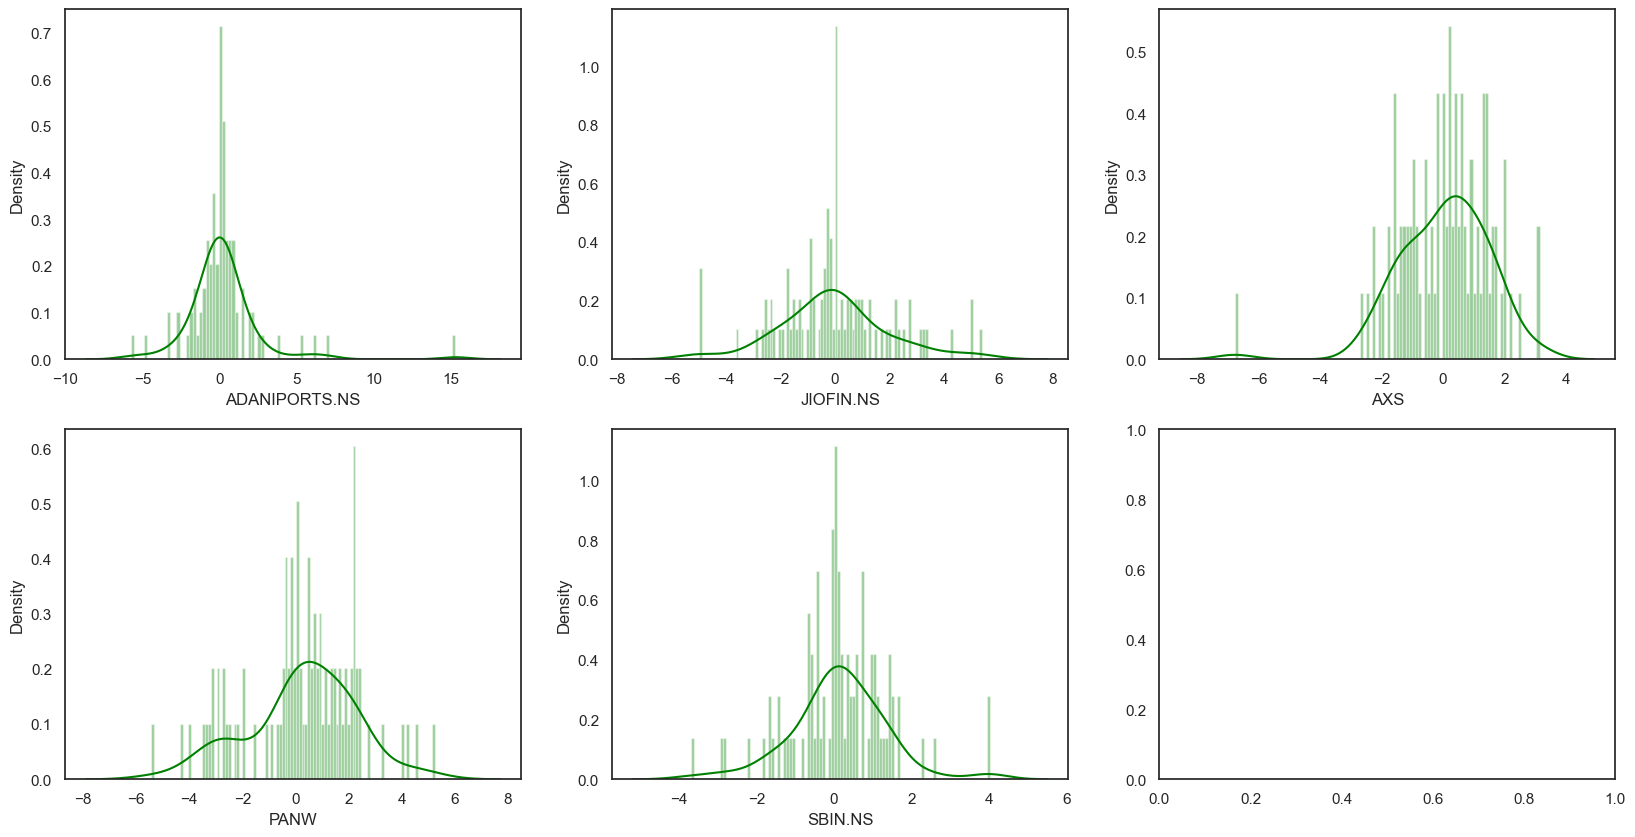

In [116]:
# Distribution plots showing the data for returns for 2019 

sns.set_style("white")

tickers = ['ADANIPORTS.NS','JIOFIN.NS', 'AXS',  'PANW','SBIN.NS']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.distplot(returns.loc['2023-01-01':'2023-12-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

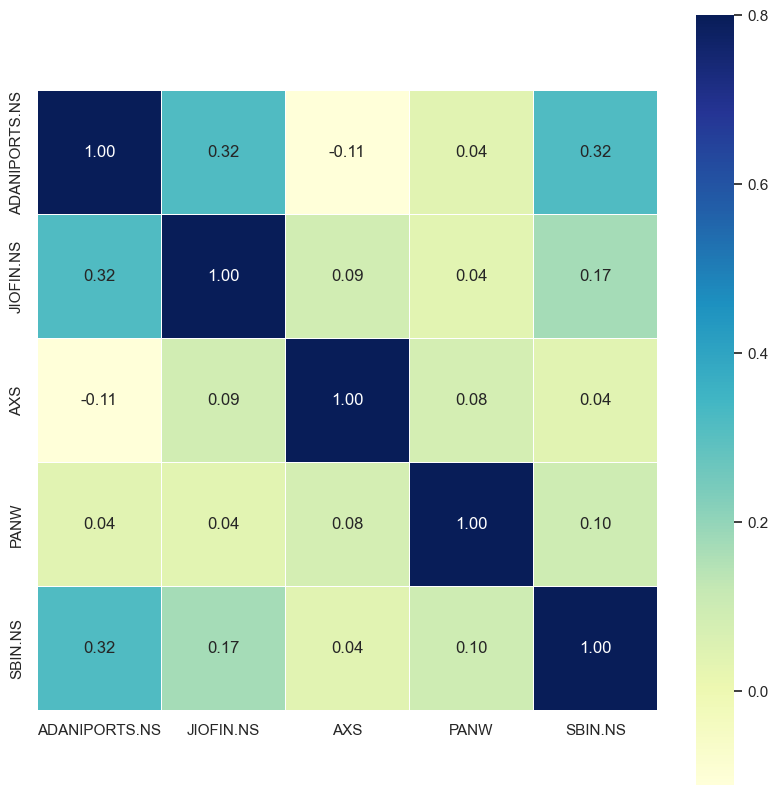

In [117]:
# The heatmap clearly ,the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

# FTSE 100 Index data


In [118]:
ftse100_idx_to_2020 = yf.download("^FTSE", start=datetime.datetime(1984, 1, 1), 
                                     end=datetime.datetime(2021, 1, 1))
ftse100_idx_to_2020
     

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-01-03,997.500000,1001.400024,997.500000,997.500000,997.500000,0
1984-01-04,997.500000,999.500000,993.299988,998.599976,998.599976,0
1984-01-05,1007.099976,1015.799988,1007.099976,1015.799988,1015.799988,0
1984-01-06,1019.000000,1029.300049,1019.000000,1029.000000,1029.000000,0
1984-01-09,1030.599976,1035.400024,1030.599976,1034.599976,1034.599976,0
...,...,...,...,...,...,...
2020-12-23,6453.200195,6497.299805,6431.200195,6495.799805,6495.799805,807695400
2020-12-24,6495.799805,6530.299805,6479.600098,6502.100098,6502.100098,477470700
2020-12-29,6502.100098,6676.600098,6502.100098,6602.700195,6602.700195,824116800


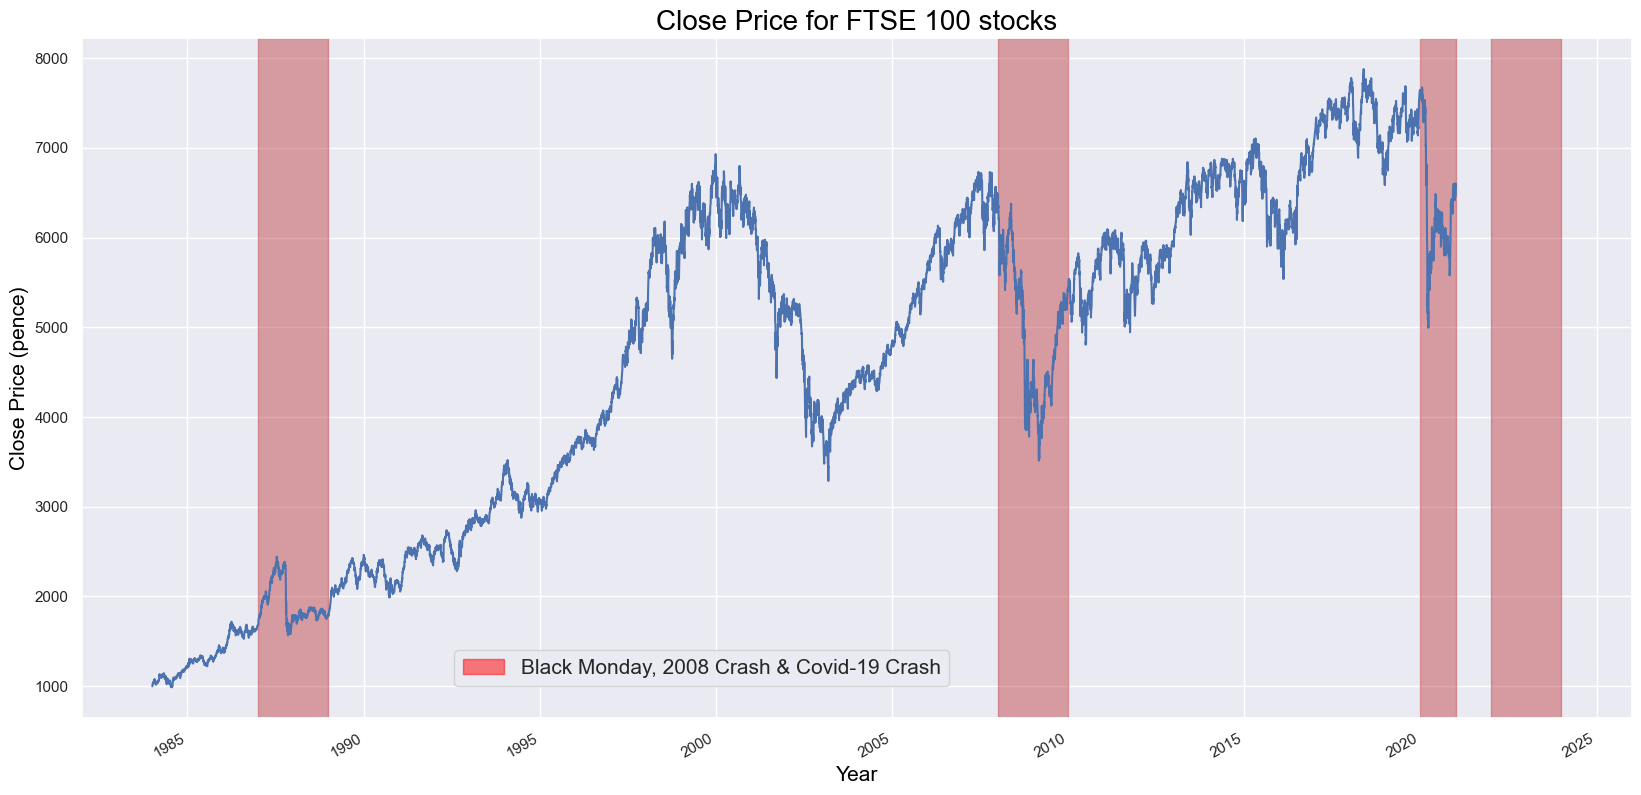

In [121]:
def ftse100_to_2024_plot():
    ftse100_idx_to_2020['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2021',color='r',alpha=.5)
    plt.axvspan('2022','2024',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for FTSE 100 stocks', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price (pence)', color = 'black', fontsize = 15)
    plt.show();

ftse100_to_2024_plot()